- We use ResNet44 on cifar10 standard train/test split (50k/10k).
- $k \times train_size$ represents the number of samples given to the model per epoch, composing a bigger train subset with each of the original train sample repeated $k$ times.
- For all samples, we apply random transformations and shuffle when fitting to the model. These transformations include:
    - Random rotation in the range [-15º, +15º];
    - Random width and height shift of a maximum of 10% the original dimension;
    - Random horizontal flip;
- Our experiment consists of 2 steps:
1. We train a model for $n$ epochs with a higher $k$, $k_{hi}$, saving its weights at the end of each epoch.
2. We load each of these weights and resume training until epoch $n$ using a lower $k$, $k_{lo}$.
- By the end of this process, we generate $n+1$ models trained for $n$ epochs in total: from the begging of epoch 1 to the end of epoch $i$ using $k_{hi}$ and from the end of epoch $i$ to the end of epoch $n$ using $k_{lo}$, for $i$ in ${0, 1, ..., n}$ ($i=0$ represents training all $n$ epochs with $k_{lo}$ and $i=n$ with $k_{hi}$). 
- We compare the accuracies of these models.

- Experimental variables:
    - $n = 200$;
    - original_train_size = 50k;
    - $k_{hi} = 3$;
    - $k_{lo} = 1$;
- Plot:
    - input format: list[(epoch, accuracy)]
    - input: [(0,0.9352),(1,0.9379),(2,0.9390),(3,0.9375),(4,0.9355),(5,0.9402),(200,0.9441)]
    - title: Models Accuracies With Reduced Augmentation From ${k_hi} \times original_train_size$ to ${k_lo} \times original_train_size$ samples Per Epoch
    - x axis: {values: epoch in range(1, n); label: Epoch Where Augmentation Reduced};
    - y axis: {values: accuracies; label: Model Accuracy};
    - red dashed line: (n, accuracy); label: n epochs with ${k_hi} \times original_train_size$ samples
    - green dashed line: (0, accuracy); label: n epochs with ${k_lo} \times original_train_size$ samples

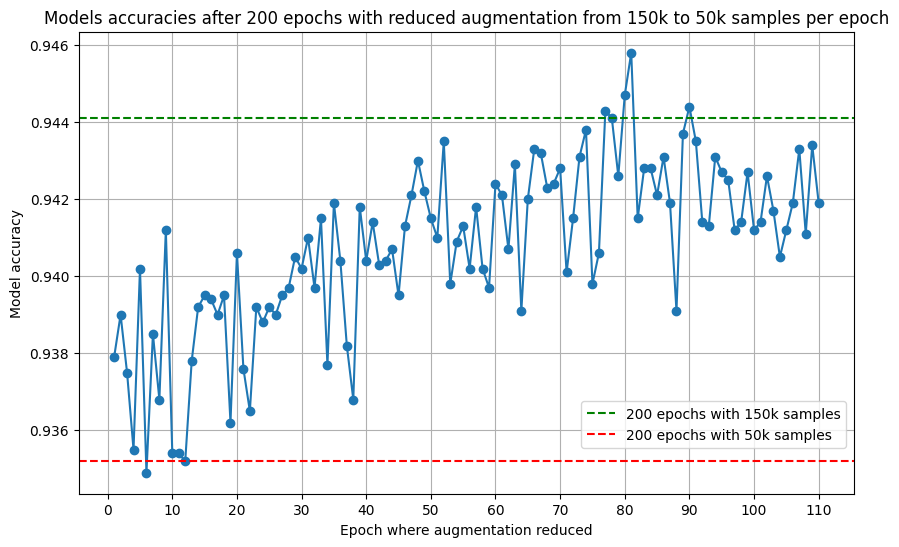

In [1]:
import matplotlib.pyplot as plt

# Experimental variables
n = 200
original_train_size = 50000
k_hi = 3
k_lo = 1
input_data = [(0, 0.9352), (1, 0.9379), (2, 0.939), (3, 0.9375), (4, 0.9355), (5, 0.9402), (6, 0.9349), (7, 0.9385), (8, 0.9368), (9, 0.9412), (10, 0.9354), (11, 0.9354), (12, 0.9352), (13, 0.9378), (14, 0.9392), (15, 0.9395), (16, 0.9394), (17, 0.939), (18, 0.9395), (19, 0.9362), (20, 0.9406), (21, 0.9376), (22, 0.9365), (23, 0.9392), (24, 0.9388), (25, 0.9392), (26, 0.939), (27, 0.9395), (28, 0.9397), (29, 0.9405), (30, 0.9402), (31, 0.941), (32, 0.9397), (33, 0.9415), (34, 0.9377), (35, 0.9419), (36, 0.9404), (37, 0.9382), (38, 0.9368), (39, 0.9418), (40, 0.9404), (41, 0.9414), (42, 0.9403), (43, 0.9404), (44, 0.9407), (45, 0.9395), (46, 0.9413), (47, 0.9421), (48, 0.943), (49, 0.9422), (50, 0.9415), (51, 0.941), (52, 0.9435), (53, 0.9398), (54, 0.9409), (55, 0.9413), (56, 0.9402), (57, 0.9418), (58, 0.9402), (59, 0.9397), (60, 0.9424), (61, 0.9421), (62, 0.9407), (63, 0.9429), (64, 0.9391), (65, 0.942), (66, 0.9433), (67, 0.9432), (68, 0.9423), (69, 0.9424), (70, 0.9428), (71, 0.9401), (72, 0.9415), (73, 0.9431), (74, 0.9438), (75, 0.9398), (76, 0.9406), (77, 0.9443), (78, 0.9441), (79, 0.9426), (80, 0.9447), (81, 0.9458), (82, 0.9415), (83, 0.9428), (84, 0.9428), (85, 0.9421), (86, 0.9431), (87, 0.9419), (88, 0.9391), (89, 0.9437), (90, 0.9444), (91, 0.9435), (92, 0.9414), (93, 0.9413), (94, 0.9431), (95, 0.9427), (96, 0.9425), (97, 0.9412), (98, 0.9414), (99, 0.9427), (100, 0.9412), (101, 0.9414), (102, 0.9426), (103, 0.9417), (104, 0.9405), (105, 0.9412), (106, 0.9419), (107, 0.9433), (108, 0.9411), (109, 0.9434), (110, 0.9419), (200, 0.9441)]

# Extract epochs and accuracies
epochs, accuracies = zip(*input_data)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs[1:-1], accuracies[1:-1], marker='o')
plt.axhline(y=accuracies[-1], color='g', linestyle='--', label=f'{n} epochs with {k_hi*original_train_size//1000}k samples')
plt.axhline(y=accuracies[0], color='r', linestyle='--', label=f'{n} epochs with {k_lo*original_train_size//1000}k samples')

# Move the legend to the top right corner outside the plot
plt.legend(loc='lower right', bbox_to_anchor=(0.99, 0.1), borderaxespad=0.)

# Fix the xticks
plt.xticks(range(min(epochs[0:-1]), max(epochs[1:-1]) + 1, 10))

# Title and labels
plt.title(f'Models accuracies after {n} epochs with reduced augmentation from {k_hi*original_train_size//1000}k to {k_lo*original_train_size//1000}k samples per epoch')
plt.xlabel('Epoch where augmentation reduced')
plt.ylabel('Model accuracy')

# Enable grid
plt.grid(True)

# Save the plot as an SVG file
plt.savefig('./plots/model_accuracies.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

